# 2 PROYECTO STORY POINTS 

# 1

#### PUNTOS A REALIZAR 
     - DETECION Y ELIMINACION DE OUTLIERS 
     - ENCODING 
     - IMPUTACION DE VALORES FALTANTES 
     - REDUCCION DE DIMENSIONALIDAD 
 # 2
    - IMPLEMENTAR LAS TRSANFORMACIONES REQURIDAS 
    - VOLVER A ENTRENAR EL MODELO DE ARBOL DE DESICION 
    
# 3 
    - ESCOGER 2 MODELOS AVANZADOS (REGRESION LINEAL CON ATRIBUTOS             POLINOMICOS) REGULARIZACION 
    -OPTIMIZAR HIPER PARAMETROS CON UN CROSS VALIDATION Y CON UN GRID        SEARCH 
    - COMPARAR CON EL PRIMER MODELO CUAL ELEGIRIA Y POR QUE 
# 4
    -DE ACUERDO A LO QUE EL MODELO PERMITE RESPONDE ALGUNAS O TODAS LAS      REGUNTAS: QUE VARIABLES FUERON RELEVANTES PARA EL MODELO PARA HACER      UNA PREDICCION? CUALES NO ?SI USASTE REGRESION LINEAL CON                NORMALIZACION PRESTA ATENCION A LOS PARAMETROS PENDIENTES , SI          USASTE DE E NSAMBLE DE ARBOLES , DEMAS DE VER LA IMPORTANCIOA DE        CADA ATRIBUTO TAMBIEN ELIGE ALGUNOS ARBOLES AL AZAR Y OBSERVA QUE        ATRIBUTOS CONSIDERAS IMPORTANTES 
     EN QUE SE DIFERENCIAN ESTOS ARBOLES ? POR QUE FINALMENETE RESPONDE
     COINCIDE CON LO QUE ESPERABAS A PARTIR DE TU EXPERIENCIA CON ESTE        DATASET
# 5 
     -COMO ES LA DISTRUBUCION DE LOS ERRORES ? DONDE FALLAN LOS MODELOS?       A QUE SE DEBE 
# 6 
     - CONCLUSIONES OBTENIDAS DEL TRABAJO 

In [67]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


In [68]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(data.shape)
data.head()



(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


### Visualizamos los tipos de propiedad

In [69]:
data.property_type.unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)


### Después contamos la cantidad de instancias para cada propiedad en este caso podemos ver que entre Departamento Casa y PH 98.596995 se encuentra concentrada el 98.596995 % de los datos, procederemos a crear un filtro para estos tipos de propiedad 


In [70]:
data['property_type'].value_counts(normalize=True) * 100


Departamento       73.180145
Casa               14.674076
PH                  9.749080
Lote                0.894586
Oficina             0.448657
Otro                0.255012
Local comercial     0.221601
Casa de campo       0.219555
Depósito            0.180690
Cochera             0.176599
Name: property_type, dtype: float64

In [71]:
data = data[data.property_type.isin(['Departamento','Casa','PH'])]
data.shape

(143145, 19)

### Después contamos la cantidad de instancias para cada propiedad en este caso podemos ver que entre Departamento Casa y PH  se encuentra concentrada el 98.596995 % de los datos, procederemos a crear un filtro para estos tipos de propiedad 


In [72]:
data['l2'].value_counts(normalize=True) * 100


Capital Federal             63.910720
Bs.As. G.B.A. Zona Norte    16.554543
Bs.As. G.B.A. Zona Sur      11.047539
Bs.As. G.B.A. Zona Oeste     8.487198
Name: l2, dtype: float64

In [73]:
data = data[data.l2.isin(['Capital Federal','Bs.As. G.B.A. Zona Norte'])]
data.shape

(115182, 19)

## Eliminamos las columnas innecesarias  

In [74]:
data.drop(columns=['l1','l3','lat','lon','start_date','end_date','created_on','description','operation_type','title','currency'], inplace=True)

In [75]:
data.describe().round(4)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,115182.0000,115182.0000,112588.0000,104561.0000,104250.0000,1.151820e+05
mean,3.0223,1.9940,1.6090,155.1024,104.8112,2.548960e+05
std,1.3478,1.0829,0.8892,1363.8369,871.9916,3.019673e+05
min,1.0000,0.0000,1.0000,10.0000,1.0000,6.000000e+03
25%,2.0000,1.0000,1.0000,51.0000,46.0000,1.220000e+05
50%,3.0000,2.0000,1.0000,75.0000,66.0000,1.780000e+05
75%,4.0000,3.0000,2.0000,123.0000,100.0000,2.799000e+05
max,35.0000,15.0000,14.0000,169000.0000,126062.0000,3.243423e+07


In [76]:
data.shape

(115182, 8)

### Porcentaje de valores faltantes por columna 

In [77]:
for col in data.columns:
  nulos= data[col].isna().sum()
  print(col,   "{:.2f}%".format(nulos*100/146660))

l2 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 1.77%
surface_total 7.24%
surface_covered 7.45%
price 0.00%
property_type 0.00%


### Eliminamos  los valores faltantes ya que no llega ni al 10% de perdida  por columna 

In [78]:
data.dropna(inplace=True)

In [79]:
data2 = data.copy() 

In [80]:
data2.shape

(102823, 8)

# Que transformaciones de datos elegi y por que ?


### - Hemos escogido para este dataset 3 transformaciones de datos que son 
  
  * Detección de outliers
  * Encoding 
  * Eliminación de valores faltantes 
  * Escalado de datos

  
### - Estas son las más apropiadas ya que el dataset cuenta con una gran cantidad de valores atípicos lo que en anteriores    ocasiones hemos podido evidenciar con los boxplots así que la primera transformación de datos será la detección de outliers  para eliminar estos después, procedemos a hacer un encoding de la variable property type y por ultimo antes del train test el   escalado de datos de todas las variables contra price  

### Realizamos un boxplot para tener una visualizacion de la variable surface total y price 

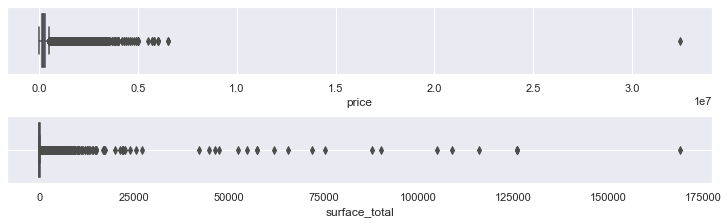

In [81]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,3),constrained_layout= True)
sns.boxplot(data=data2,x="surface_total", ax=ax2)
sns.boxplot(data=data2,x="price", ax=ax1)
plt.grid()
plt.show()

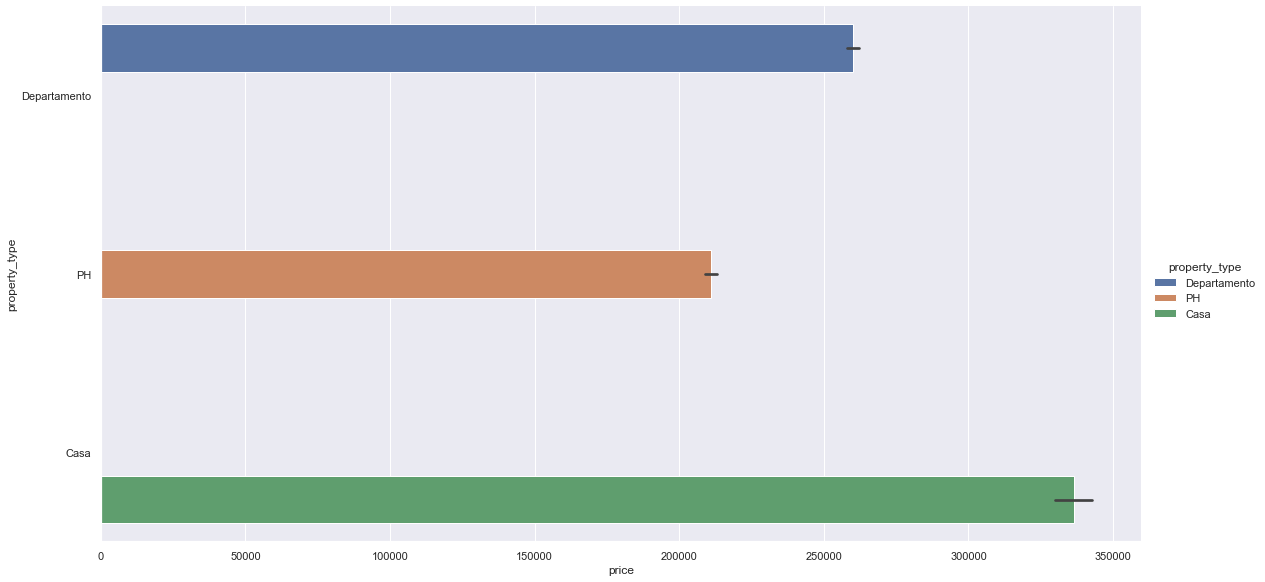

In [82]:
sns.catplot(x='price', y="property_type",hue='property_type', data=data2, kind = "bar",height=8,aspect=2,legend=True)


### Como podemos observar en  en ambos graficos las variables tienen valores atipicos que distorsionan la visualiacion asi como tambien crear confusion en nuestros modelos por lo que aplicaremos un filtro para el precio segun las 2 visualizaciones vamos a filtar el dataset con propiedades con valor de  hasta 450000

In [84]:
data2 = data2[((data2['price'] <= 4500000))]

In [85]:
data3=data2

In [86]:
data3.shape

(102800, 8)

# Detecion de outliers 


In [87]:
#definimos los cuantiles
Q1= data3.quantile(0.25)
Q3= data3.quantile(0.75)
IQR = Q3-Q1
#aplicamos a todas las columnas del data
data3=data3[~((data3<(Q1-1.5*IQR))|(data3>(Q3+1.5*IQR))).any(axis=1)]
data3.shape

<ipython-input-87-ba0328c431ca>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data3=data3[~((data3<(Q1-1.5*IQR))|(data3>(Q3+1.5*IQR))).any(axis=1)]
<ipython-input-87-ba0328c431ca>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data3=data3[~((data3<(Q1-1.5*IQR))|(data3>(Q3+1.5*IQR))).any(axis=1)]


(87148, 8)

In [88]:
data3.head()

,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,Capital Federal,2.0,1.0,1.0,70.0,70.0,159500.0,PH


## Vamos a hacer encoding para la variable property_type para asi poder alimentar el modelo con esta variable a la hora de hace predicciones 

In [89]:
dummies = pd.get_dummies(data3, columns=["property_type"])
dummies.head()

,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
1,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,Capital Federal,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1
6,Capital Federal,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1


In [90]:
dummies.shape
type(dummies)

pandas.core.frame.DataFrame

## Realizamos un mapa de calor para  visualizar valores faltantes 

<AxesSubplot:>

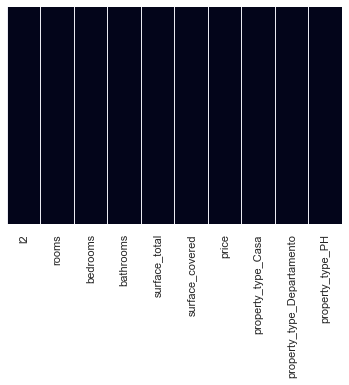

In [91]:
sns.heatmap(dummies.isnull(), yticklabels=False, cbar=False)


In [92]:
dummies2=dummies.copy()

In [93]:
dummies2.shape

(87148, 10)

# Definimos x e y para entrenar nuestros modelos 

In [140]:
X = dummies2[["rooms","surface_covered","surface_total","bedrooms","bathrooms","property_type_Casa","property_type_Departamento","property_type_PH"]] #Observa que sólo usamos 3 features del dataset
y = dummies2['price']

dummies2.shape


(87148, 10)

# Escalado de datos

In [141]:
escalador = StandardScaler()
escalador.fit(X)

StandardScaler()

In [142]:
X_escalado = escalador.transform(X)
X_escalado

array([[-0.74938748, -0.28230254, -0.187059  , ..., -0.16149111,
        -2.52261424,  2.83884548],
       [-0.74938748, -0.71875886, -0.83292108, ..., -0.16149111,
        -2.52261424,  2.83884548],
       [-0.74938748, -0.55089104,  0.20045826, ..., -0.16149111,
        -2.52261424,  2.83884548],
       ...,
       [-1.74904491, -1.05449448, -0.70374867, ..., -0.16149111,
         0.39641416, -0.35225588],
       [-0.74938748, -0.95377379, -1.01376247, ..., -0.16149111,
         0.39641416, -0.35225588],
       [ 0.25026995,  0.28844802, -0.05788658, ..., -0.16149111,
         0.39641416, -0.35225588]])

## Train test split 


In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_escalado, y,test_size=0.20,random_state=42)

# - Construimos un DecisionTreeRegressor con nuestro nuevo dataset transfromado 

In [144]:
decision_tree= DecisionTreeRegressor(max_depth=25,random_state=42)
decision_tree.fit(X_train, y_train)

y_arbol_train_pred = decision_tree.predict(X_train)
y_arbol_test_pred= decision_tree.predict(X_test)

In [145]:

MAE_train=mean_absolute_error(y_train,y_arbol_train_pred)
MAE_test=mean_absolute_error(y_test,y_arbol_test_pred)
RMSE_train=np.sqrt(mean_squared_error(y_train,y_arbol_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_arbol_test_pred))
r2_train= metrics.r2_score(y_train, y_arbol_train_pred)
r2_test= metrics.r2_score(y_test, y_arbol_test_pred)

In [146]:
print("El Error absoluto medio train:",MAE_train)
print("El Error absoluto medio test:",MAE_test)
print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

El Error absoluto medio train: 21322.177352213374
El Error absoluto medio test: 31569.6414932944
*******************************************
Error cudratico medio train: 35189.94309342781
Error cudratico medio test: 51373.530595351134
*******************************************
El Coeficiente de determinacion train: 0.8587891487613118
El Coeficiente de determinacion test: 0.7021419682032797
*******************************************


### Metricas del anterior arbol de desicion 



El Error absoluto medio train: 23681.8678332786
El Error absoluto medio test: 49388.884628718595
*******************************************
Error cudratico medio train: 54047.89650654257
Error cudratico medio test: 141864.7831195434
*******************************************
El Coeficiente de determinacion train: 0.9671459367517681
El Coeficiente de determinacion test: 0.7793119430612151

### En comparación con el primer modelo vemos una mejora sustancial en este respecto al MAE y al RMSE , sin embargo la mejora en el R2  no es muy  significativa  habiendo mejorado este menos de 1% frente al modelo optimizado de la anterior vez y habiendo bajado un 7% su rendimiento  frente al primer árbol construido con parámetros por default, haciendo precisión que la profundidad del árbol más reciente  fue escogida de manera manual 

# Modelos avanzados 


## - Vamos a construir un random forest como primer modelo avanzado antes de crear este vamos a hacer cross validation a los datos 


In [148]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
clf_cv =cross_validate(clf,X, y, cv=5,)


In [180]:
clf_cv

{'fit_time': array([19.14434791, 13.85581517, 13.34197021, 13.58159328, 13.92435718]),
 'score_time': array([0.364043  , 0.36700058, 0.36644483, 0.37152267, 0.33597326]),
 'test_score': array([0.66175734, 0.68418666, 0.65676705, 0.64853176, 0.69040575])}

In [149]:
X_train,X_test,y_train,y_test= train_test_split(X_escalado, y,test_size=0.20,random_state=42)

In [170]:
clf = RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForest = clf

## - Para las metricas de evalucacion hemos escogido el error cuadratico medio y el r2  

In [151]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
#print(metrics.accuracy_score(y_train, y_train_pred))
#print(metrics.accuracy_score(y_test, y_test_pred))

In [152]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)



In [153]:
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

Error cudratico medio train: 36381.67849428846
Error cudratico medio test: 47422.84623428616
*******************************************
El Coeficiente de determinacion train: 0.8490627596594701
El Coeficiente de determinacion test: 0.7461917579846129
*******************************************


In [154]:
clf.oob_score_

0.7425537013847717

In [155]:
clf.feature_importances_

array([0.05572843, 0.37613703, 0.34899884, 0.03723394, 0.14475104,
       0.00589698, 0.02179718, 0.00945656])

In [52]:
clf.estimators_

[DecisionTreeRegressor(max_features='sqrt', random_state=1608637542),
 DecisionTreeRegressor(max_features='sqrt', random_state=1273642419),
 DecisionTreeRegressor(max_features='sqrt', random_state=1935803228),
 DecisionTreeRegressor(max_features='sqrt', random_state=787846414),
 DecisionTreeRegressor(max_features='sqrt', random_state=996406378),
 DecisionTreeRegressor(max_features='sqrt', random_state=1201263687),
 DecisionTreeRegressor(max_features='sqrt', random_state=423734972),
 DecisionTreeRegressor(max_features='sqrt', random_state=415968276),
 DecisionTreeRegressor(max_features='sqrt', random_state=670094950),
 DecisionTreeRegressor(max_features='sqrt', random_state=1914837113),
 DecisionTreeRegressor(max_features='sqrt', random_state=669991378),
 DecisionTreeRegressor(max_features='sqrt', random_state=429389014),
 DecisionTreeRegressor(max_features='sqrt', random_state=249467210),
 DecisionTreeRegressor(max_features='sqrt', random_state=1972458954),
 DecisionTreeRegressor(max_f

In [87]:
clf_tree = clf.estimators_[70]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1324556529,
 'splitter': 'best'}

In [ ]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

In [ ]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

In [ ]:
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

In [ ]:
train_RMSE = []
test_RMSE = []
train_r2 = []
test_r2 = []
oob_scores = []

N_estimadores= [1,2,3,4,5,10,25,50,100,250,500,1000]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestRegressor(n_estimators=estimadores, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_RMSE.append(mean_squared_error(y_train,y_train_pred))
    test_RMSE.append(mean_squared_error(y_test,y_test_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    
train_RMSE = np.array(train_RMSE)
test_RMSE = np.array(test_RMSE)

train_r2 = np.array(train_r2)
test_r2 = np.array(test_r2)


oob_scores = np.array(oob_scores)

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_RMSE, label = 'train_RMSE')
plt.plot(N_estimadores, test_RMSE, label = 'test_RMSE')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_r2, label = 'train_r2')
plt.plot(N_estimadores, test_r2, label = 'test_r2')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('r2')
plt.legend()
# plt.xlim(0,50)
plt.show()



## Ahora vamos a construir un Adaboost 

In [156]:
from sklearn.ensemble import AdaBoostRegressor

In [157]:
#X = dummies[["rooms","surface_covered","surface_total","bedrooms","bathrooms","property_type_Casa","property_type_Casa de campo","property_type_Cochera","property_type_Departamento","property_type_Depósito","property_type_Local comercial","property_type_Lote","property_type_Oficina","property_type_Otro","property_type_PH"]] #Observa que sólo usamos 3 features del dataset
#y = dummies['price']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_escalado, y, test_size=0.30, random_state=42)

In [165]:
ada_clf = AdaBoostRegressor(DecisionTreeRegressor())
# Entrenamos el modelo
ada_clf.fit(X_train, y_train)
#get_params().keys()

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

In [166]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

In [167]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

In [168]:
print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

*******************************************
Error cudratico medio train: 40850.97800118868
Error cudratico medio test: 52146.00228011956
*******************************************
El Coeficiente de determinacion train: 0.8090045752197539
El Coeficiente de determinacion test: 0.6946257677092555
*******************************************


In [194]:

param_dist = {
 'n_estimators': [50, 100,250,500,1000],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

ada_clf = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

ada_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 250, 500,
                                                         1000]})

In [195]:
ada_clf.best_params_

{'n_estimators': 100, 'loss': 'linear', 'learning_rate': 0.05}

In [99]:
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),n_estimators=100,loss='linear',learning_rate=0.05)


In [100]:
ada_clf.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                  learning_rate=0.05, n_estimators=100)

In [101]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

In [102]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

In [103]:
print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

*******************************************
Error cudratico medio train: 36333.48103648397
Error cudratico medio test: 50559.588646788216
*******************************************
El Coeficiente de determinacion train: 0.8517321761452
El Coeficiente de determinacion test: 0.7153056334779515
*******************************************


Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 35285.72201712695
Raíz del error cuadrático medio en Test: 46438.35466578335
--------------------------
R2 o coeficiente de determinacion train : 0.8574996063018936
R2 o coeficiente de determinacion test: 0.7578168086877286
--------------------------


C:\Users\Cankil\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Cankil\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


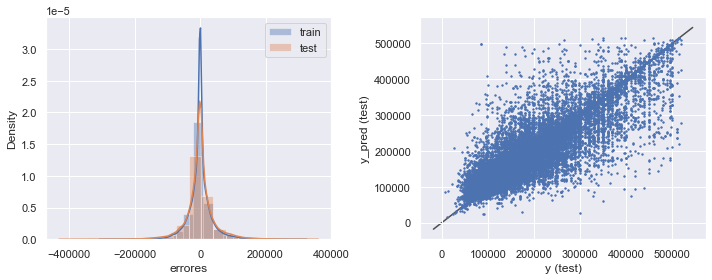

Modelo: Random Forest
Raíz del error cuadrático medio en Train: 36262.5918909516
Raíz del error cuadrático medio en Test: 48029.75609717008
--------------------------
R2 o coeficiente de determinacion train : 0.8495002660938038
R2 o coeficiente de determinacion test: 0.740933586961983
--------------------------


C:\Users\Cankil\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Cankil\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


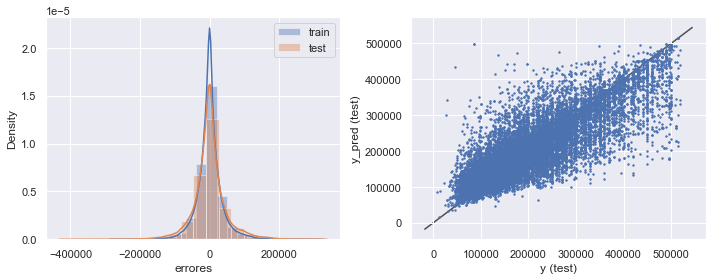

Modelo: ADA Boost
Raíz del error cuadrático medio en Train: 40850.97800118868
Raíz del error cuadrático medio en Test: 52146.00228011956
--------------------------
R2 o coeficiente de determinacion train : 0.8090045752197539
R2 o coeficiente de determinacion test: 0.6946257677092555
--------------------------


C:\Users\Cankil\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Cankil\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


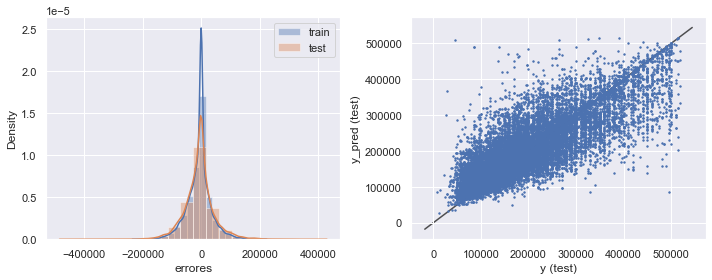

In [172]:
modelos = ['Árbol de Decisión', 'Random Forest', 'ADA Boost']

for i, model in enumerate([decision_tree, RandomForest, ada_clf]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print("--------------------------")
    
    
    
    print(f'R2 o coeficiente de determinacion train : {r2_train}')
    print(f'R2 o coeficiente de determinacion test: {r2_test}')
    print("--------------------------")
    
    plt.figure(figsize = (10,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()


### Después de haber optimizado y evaluado los modelos construidos hasta ahora escogería el Random Forest siendo este el que mayor rendimiento ha mostrado en las métricas de evaluación tendiendo un RMSE para train de 36381.67 y para test de 47422.84 así como un R2 de 0.84 en train y 0.7461 en test mostrando poca varianza y desempeño sobresaliente frente a los otros 2 donde alcanzaron valores similares para el RMSE en train a este modelo pero aun así el random forest ostenta el RMSE  más bajo, ademas el ada boost y el árbol no alcanzaron el R2 del randon forest  por lo que para este caso seria el modelo mas robusto a utilizar


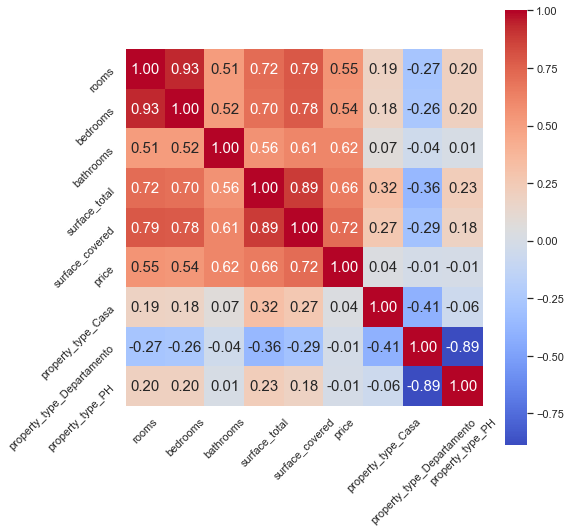

In [169]:
corr = dummies2.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()